In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from config import *
from models import *
from masks import *

In [3]:
model = base_model(verbose=False)
model.load_weights(EXAMPLE_MODEL)

In [28]:
img_names = [f for f in os.listdir(TEST_IMG_PATH) if f.endswith('.tif')]
len(img_names)

3

In [8]:
img = cv2.imread(TEST_IMG_PATH + img_names[0])[:640, :640, :]

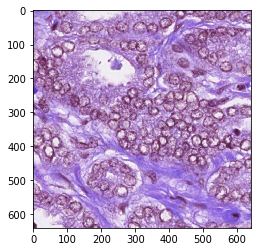

In [9]:
plt.imshow(img)

In [16]:
ground_truth = cv2.imread(TEST_MASK_PATH + img_names[0].rstrip('tif') + 'png', cv2.IMREAD_GRAYSCALE)[:640, :640]

In [18]:
from timeit import default_timer as timer
import pandas as pd
from sklearn import metrics

In [29]:
results = pd.DataFrame(columns=['stride', 'time', 'ji', 'dice', 'img'])

for name in img_names:
    
    img = cv2.imread(TEST_IMG_PATH + name)[:640, :640, :]
    ground_truth = cv2.imread(TEST_MASK_PATH + name.rstrip('tif') + 'png', cv2.IMREAD_GRAYSCALE)[:640, :640]
    
    for i in range(128):
        stride = 128-i

        start_image = timer()
        result = collect_output_median(model, img, stride=stride)
        end_image = timer()

        mask = otsu_theshold(result)

        ji = metrics.jaccard_score(list(ground_truth.flatten()/255), list(mask.flatten()/255))
        dice = metrics.f1_score(list(ground_truth.flatten()/255), list(mask.flatten()/255))

        results.loc[i] = [stride, end_image-start_image, ji, dice, name]

results.to_csv(DUMPS_PATH + 'collected_output_median.csv')

In [30]:
results.head(10)

,stride,time,ji,dice,img
0,128,25.888683,0.481999,0.650472,TCGA-G9-6336-01Z-00-DX1.tif


In [ ]:
results = pd.DataFrame(columns=['stride', 'time', 'ji', 'dice', 'img'])

for name in img_names:
    
    img = cv2.imread(TEST_IMG_PATH + name)[:640, :640, :]
    ground_truth = cv2.imread(TEST_MASK_PATH + name.rstrip('tif') + 'png', cv2.IMREAD_GRAYSCALE)[:640, :640]
    
    for i in range(128):
        stride = 128-i

        start_image = timer()
        result = collect_output_median(model, img, stride=stride, process_predicted_patch=otsu_theshold)
        end_image = timer()

        mask = otsu_theshold(result)

        ji = metrics.jaccard_score(list(ground_truth.flatten()/255), list(mask.flatten()/255))
        dice = metrics.f1_score(list(ground_truth.flatten()/255), list(mask.flatten()/255))

        results.loc[i] = [stride, end_image-start_image, ji, dice, name]

results.to_csv(DUMPS_PATH + 'collected_output_thresholded_median.csv')

In [ ]:
results.head(10)

In [ ]:
results = pd.DataFrame(columns=['stride', 'time', 'ji', 'dice', 'img'])

for name in img_names:
    
    img = cv2.imread(TEST_IMG_PATH + name)[:640, :640, :]
    ground_truth = cv2.imread(TEST_MASK_PATH + name.rstrip('tif') + 'png', cv2.IMREAD_GRAYSCALE)[:640, :640]
    
    for i in range(128):
        stride = 128-i

        start_image = timer()
        result = collect_output_median(model, img, stride=stride, process_predicted_patch=otsu_theshold)
        end_image = timer()

        mask = otsu_theshold(result)

        ji = metrics.jaccard_score(list(ground_truth.flatten()/255), list(mask.flatten()/255))
        dice = metrics.f1_score(list(ground_truth.flatten()/255), list(mask.flatten()/255))

        results.loc[i] = [stride, end_image-start_image, ji, dice, name]

results.to_csv(DUMPS_PATH + 'collected_output_thresholded_median.csv')

In [ ]:
results.head(10)